# Car dataset for predict the price.
>we will use some of this data to predict the price to specific car brand.

>we will explore data analysis on this dataset and will apply ML model to predict the price. 

In [1]:
#import required library.

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(120,20)})

%matplotlib inline

 # __some insight.__

In [2]:
# reading the data file
df= pd.read_csv(r'C:\Users\mahmoud\Desktop\cdsp\autos.csv', encoding='ISO-8859-1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [4]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [5]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
# some insight.
df.groupby('gearbox')['model'].value_counts()

gearbox    model            
automatik  andere               6336
           e_klasse             5649
           5er                  4856
           3er                  4301
           c_klasse             3997
                                ... 
manuell    serie_3                 3
           300c                    1
           gl                      1
           range_rover_sport       1
           serie_1                 1
Name: model, Length: 488, dtype: int64

In [7]:
df.groupby('fuelType')['model'].value_counts()

fuelType  model  
andere    601        33
          andere     29
          golf        8
          astra       5
          focus       5
                     ..
lpg       up          1
          v60         1
          viano       1
          x_trail     1
          ypsilon     1
Name: model, Length: 829, dtype: int64

In [8]:
# since we have alarge data set lets reduce our data set
# drop unuseful columns for our case.

df.drop(columns=['dateCrawled','seller','offerType','abtest','monthOfRegistration','notRepairedDamage','dateCreated','nrOfPictures','postalCode','lastSeen'],axis=1, inplace=True)

In [9]:
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,diesel,jeep
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda


<AxesSubplot:ylabel='brand'>

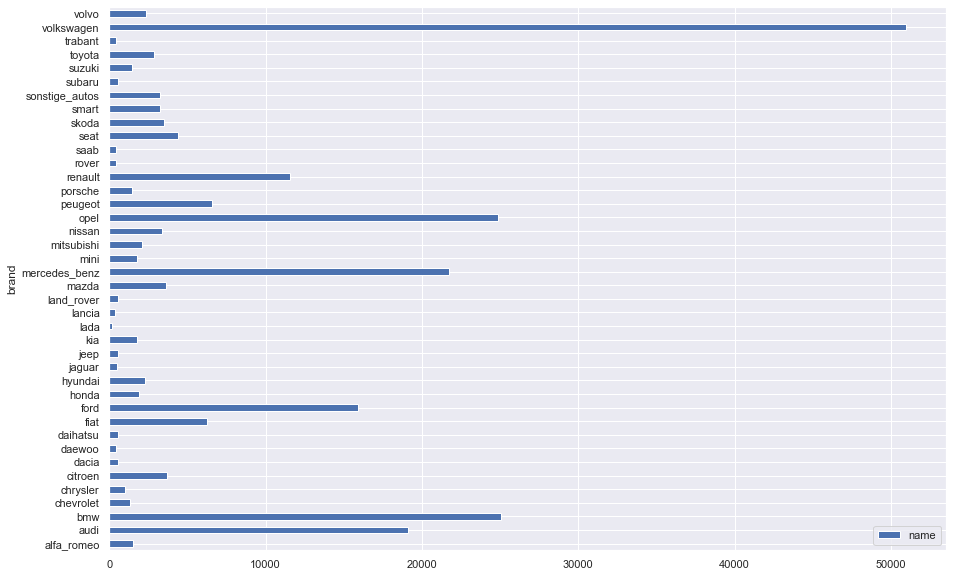

In [10]:
# most car sales by brand.
pd.DataFrame(df.groupby('brand')['name'].nunique()).plot(kind='barh',figsize=(15, 10))

[Text(0, 0, '274214'), Text(0, 0, '77105')]

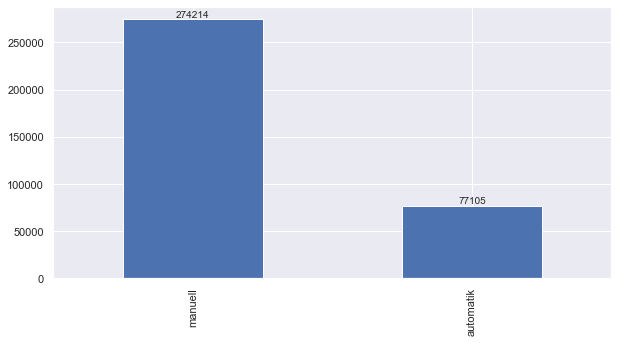

In [11]:
# manuell vs automatik

ax= df['gearbox'].value_counts().plot(kind='bar', figsize=(10,5))
ax.bar_label(ax.containers[0])

[Text(0, 0, '986'),
 Text(0, 0, '714'),
 Text(0, 0, '583'),
 Text(0, 0, '510'),
 Text(0, 0, '489'),
 Text(0, 0, '469'),
 Text(0, 0, '438'),
 Text(0, 0, '430'),
 Text(0, 0, '430'),
 Text(0, 0, '397')]

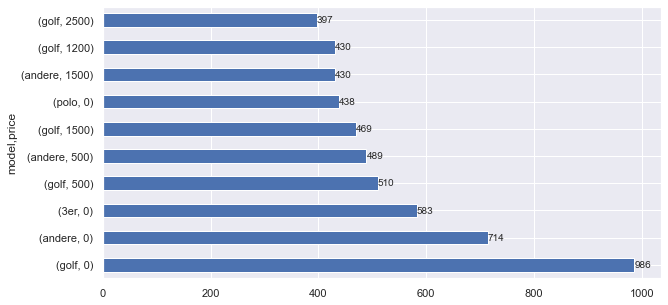

In [12]:
# most car sales by price.

ax= df.groupby('model')['price'].value_counts().nlargest(10).plot(kind='barh', figsize=(10,5))
ax.bar_label(ax.containers[0])

[Text(0, 0, '2002'),
 Text(0, 0, '2006'),
 Text(0, 0, '1999'),
 Text(0, 0, '2017'),
 Text(0, 0, '1999')]

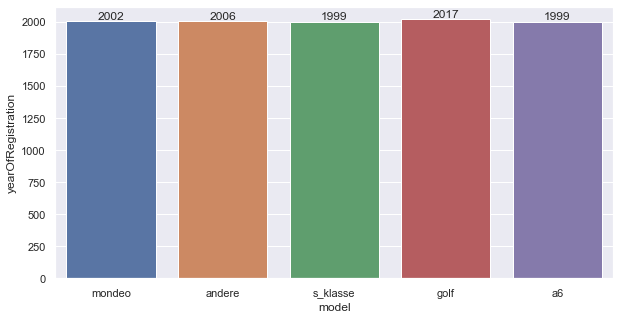

In [13]:
# top 6 car sales by year of manufacture.

sns.set(rc={'figure.figsize':(10,5)})
ax= sns.barplot(x='model',y='yearOfRegistration', data=df.nlargest(6,'price'))
ax.bar_label(ax.containers[0])

## handling the null values.

In [14]:
df.head(5)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,diesel,jeep
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda


In [15]:
# the null value in the data set
df.isnull().sum()

name                      0
price                     0
vehicleType           37869
yearOfRegistration        0
gearbox               20209
powerPS                   0
model                 20484
kilometer                 0
fuelType              33386
brand                     0
dtype: int64

In [16]:
# take alook for unique value.
df['vehicleType'].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [17]:
# how much null valu take from our data.

df['vehicleType'].isnull().sum() / df['vehicleType'].count() *100

11.349611429633248

In [18]:
# since we know that our null value is 11% from our feature then we cant deleted.
# estimate the null value for [vehicleType].

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['vehicleType']= imputer.fit_transform(df['vehicleType'].array.reshape(-1, 1))

df['vehicleType'].isnull().sum()

0

In [21]:
df['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [22]:
# reblace the null value in ['gearbox'] column with the most_frequent

df['gearbox']= imputer.fit_transform(df['gearbox'].array.reshape(-1, 1))

df['gearbox'].isnull().sum()

0

In [23]:
# since we have a column called [name] lets used to estimate anull value in [model] column.
# apply afunction to get the model from [name] column.

df.loc[df['model'].isnull(),'model'] = df['name'].apply(lambda x: x.split("_")[0])
df['model'].isnull().sum()

0

Text(0, 0.5, 'Count')

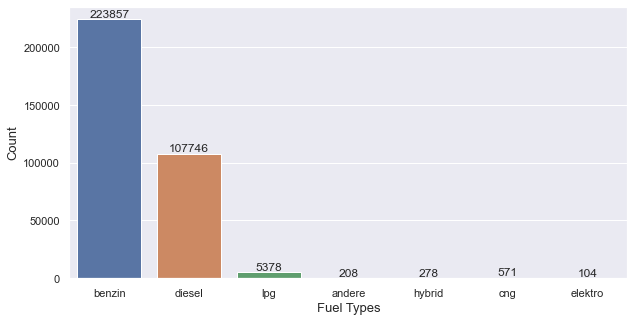

In [24]:
# most common fule types.

sns.set(rc={'figure.figsize':(10,5)})
ax= sns.countplot(x=df['fuelType'], data=df)
ax.bar_label(ax.containers[0])
plt.xlabel('Fuel Types' ,fontsize=13)
plt.ylabel('Count', fontsize=13)

In [25]:
# reblace the null value in ['gearbox'] column with the most_frequent.

df['fuelType']= imputer.fit_transform(df['fuelType'].array.reshape(-1, 1))
df['fuelType'].isnull().sum()

0

In [26]:
# no null values.
df.isnull().sum()

name                  0
price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
dtype: int64

In [27]:
df.head(5)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand
0,Golf_3_1.6,480,limousine,1993,manuell,0,golf,150000,benzin,volkswagen
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,A5,125000,diesel,audi
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,grand,125000,diesel,jeep
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,diesel,skoda


[Text(0, 0, '79640'),
 Text(0, 0, '40274'),
 Text(0, 0, '40136'),
 Text(0, 0, '35309'),
 Text(0, 0, '32873')]

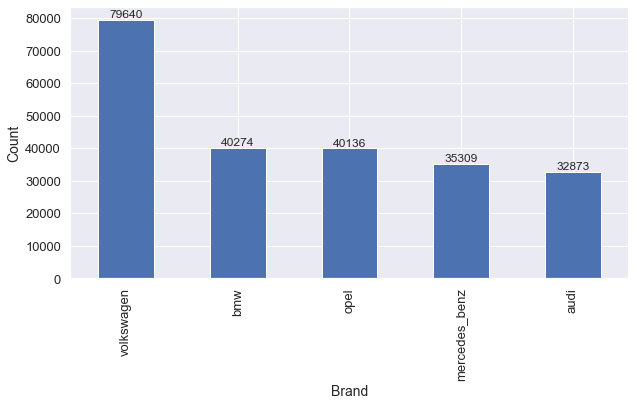

In [28]:
ax= df['brand'].value_counts().nlargest().plot(kind='bar', figsize=(10,5), fontsize=(13))
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Count', fontsize=14)
ax.bar_label(ax.containers[0])

<AxesSubplot:>

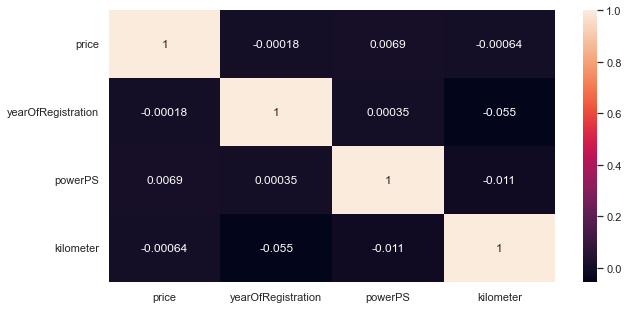

In [29]:
# plot the corlation betw the feature
sns.set(rc={'figure.figsize':(10,5)})
x= df.corr()
sns.heatmap(x, annot=True)

In [30]:
# the dataframe will use for train and deploy the model
# will take the highest selling brand.

df['brand'].value_counts().nlargest(1)

volkswagen    79640
Name: brand, dtype: int64

In [31]:
df= pd.DataFrame(df[(df['brand'].isin(['volkswagen'])) & (df['model'].isin(['golf','passat','polo','scirocco','touran','tiguan','beetle']))])

# __data preprocessing.__

In [32]:
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand
0,Golf_3_1.6,480,limousine,1993,manuell,0,golf,150000,benzin,volkswagen
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen
9,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,999,kleinwagen,1998,manuell,101,golf,150000,benzin,volkswagen
11,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,kombi,2005,manuell,140,passat,150000,diesel,volkswagen
12,"VW_Passat_Facelift_35i__""7Sitzer""",999,kombi,1995,manuell,115,passat,150000,benzin,volkswagen


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59436 entries, 0 to 371526
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                59436 non-null  object
 1   price               59436 non-null  int64 
 2   vehicleType         59436 non-null  object
 3   yearOfRegistration  59436 non-null  int64 
 4   gearbox             59436 non-null  object
 5   powerPS             59436 non-null  int64 
 6   model               59436 non-null  object
 7   kilometer           59436 non-null  int64 
 8   fuelType            59436 non-null  object
 9   brand               59436 non-null  object
dtypes: int64(4), object(6)
memory usage: 5.0+ MB


In [34]:
# clean and extract the car name
df['name']= df['name'].apply(lambda x: ' '.join([str(i) for i in x.split('_')[0:2]]))

In [35]:
# drop the duplicates value in the data frame
df.drop_duplicates(keep=False,inplace=True)

In [36]:
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand
0,Golf 3,480,limousine,1993,manuell,0,golf,150000,benzin,volkswagen
3,GOLF 4,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen
9,VW Golf,999,kleinwagen,1998,manuell,101,golf,150000,benzin,volkswagen
11,Volkswagen Passat,2799,kombi,2005,manuell,140,passat,150000,diesel,volkswagen
12,VW Passat,999,kombi,1995,manuell,115,passat,150000,benzin,volkswagen


In [37]:
# unique vqlue in the data set
for i in df.columns:
    col1= df['name'].unique()
    col2= df['vehicleType'].unique()
    col3= df['gearbox'].unique()
    col4= df['model'].unique()
    col5= df['fuelType'].unique()
    col6= df['brand'].unique()
    
print ('name :' ,col1 , 
       'vehicleType:' ,col2, 
       'gearbox:' ,col3, 
       'model:' ,col4, 
       'fuelType:' ,col5, 
       'brand:' ,col6)

name : ['Golf 3' 'GOLF 4' 'VW Golf' ... 'Vw POLO' 'Golf5 gti' 'Angestellte'] vehicleType: ['limousine' 'kleinwagen' 'kombi' 'bus' 'andere' 'cabrio' 'suv' 'coupe'] gearbox: ['manuell' 'automatik'] model: ['golf' 'passat' 'polo' 'touran' 'tiguan' 'beetle' 'scirocco'] fuelType: ['benzin' 'diesel' 'lpg' 'cng' 'elektro' 'andere' 'hybrid'] brand: ['volkswagen']


In [38]:
# drop the column name.

df.drop('name', axis=1, inplace=True)

In [39]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand
0,480,limousine,1993,manuell,0,golf,150000,benzin,volkswagen
3,1500,kleinwagen,2001,manuell,75,golf,150000,benzin,volkswagen
9,999,kleinwagen,1998,manuell,101,golf,150000,benzin,volkswagen
11,2799,kombi,2005,manuell,140,passat,150000,diesel,volkswagen
12,999,kombi,1995,manuell,115,passat,150000,benzin,volkswagen


In [40]:
# value counts.
df['vehicleType'].value_counts()

limousine     19602
kleinwagen    11298
kombi          8685
bus            2889
cabrio         2025
coupe          1419
suv             774
andere          246
Name: vehicleType, dtype: int64

In [41]:
# replceing the name 'kombi' to 'van'
df['vehicleType'] = df['vehicleType'].str.replace('kombi','van')

In [42]:
# replceing the andere to limousine 
df['vehicleType'] = df['vehicleType'].str.replace('andere','limousine')

In [43]:
# value counts after replceing the value.
df['vehicleType'].value_counts()

limousine     19848
kleinwagen    11298
van            8685
bus            2889
cabrio         2025
coupe          1419
suv             774
Name: vehicleType, dtype: int64

In [44]:
# value counts.
df['gearbox'].value_counts()

manuell      40386
automatik     6552
Name: gearbox, dtype: int64

In [45]:
# replacing manuell with manual.
df['gearbox'] = df['gearbox'].str.replace('manuell','manual')

In [46]:
# replacing automatik with auto.
df['gearbox'] = df['gearbox'].str.replace('automatik','auto')

In [47]:
# value counts after reblacing.
df['gearbox'].value_counts()

manual    40386
auto       6552
Name: gearbox, dtype: int64

In [48]:
# value counts.
df['fuelType'].value_counts()

benzin     32883
diesel     13627
lpg          325
cng           84
andere        11
elektro        4
hybrid         4
Name: fuelType, dtype: int64

In [49]:
# drop some value.

df.drop(df.index[df['fuelType'] == 'lpg'], inplace = True)

In [50]:
df.drop(df.index[df['fuelType'] == 'cng'], inplace = True)

In [51]:
df.drop(df.index[df['fuelType'] == 'andere'], inplace = True)

In [52]:
# value counts.
df['fuelType'].value_counts()

benzin     32883
diesel     13627
elektro        4
hybrid         4
Name: fuelType, dtype: int64

In [53]:
df['fuelType']= df['fuelType'].replace({"benzin","diesel","elektro","hybrid"},{"gasoline","diesel","electric","hybrid"})

In [54]:
# value counts after replace.
df['fuelType'].value_counts()

electric    32883
diesel      13627
gasoline        4
hybrid          4
Name: fuelType, dtype: int64

<AxesSubplot:>

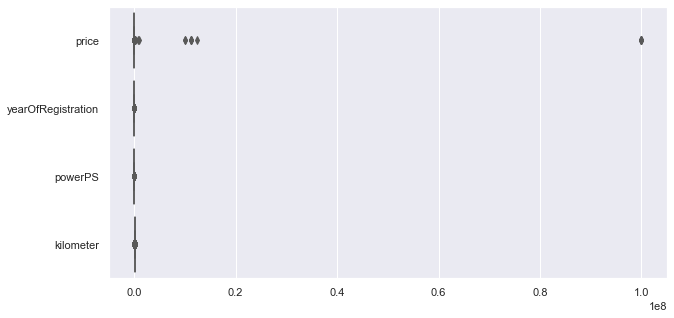

In [55]:
sns.boxplot(data=df, orient="h", palette="Set2")

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

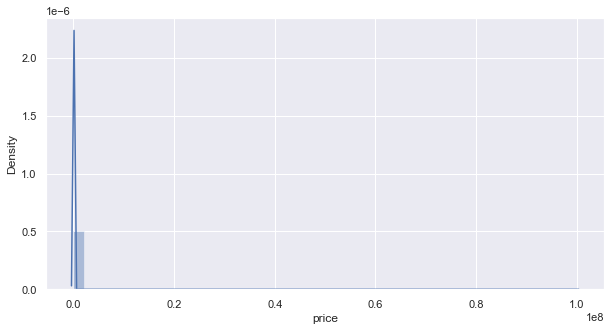

In [56]:
# plot the distribution for the price column.
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df['price'])

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

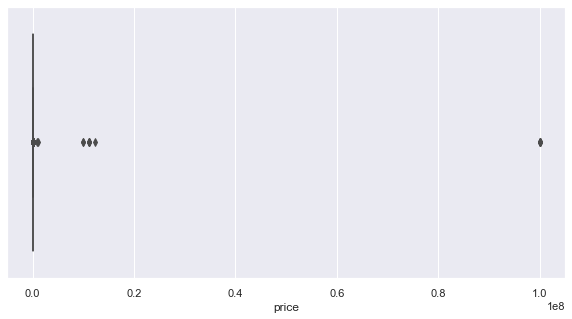

In [57]:
# the outliers before imputation
sns.boxplot(df['price'])

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

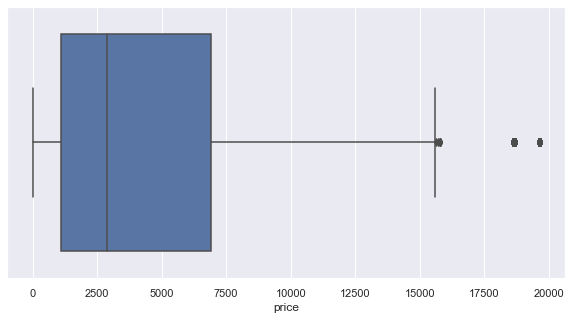

In [58]:
# impute the outliers for the [price] column.

for i in df['price']:
    q1= df['price'].quantile(0.25)
    q3= df['price'].quantile(0.75)
    iqr= q3-q1
    lower_tail= q1 - 1.5 * iqr
    upper_tail= q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df['price']= df['price'].replace(i, np.mean(df['price']))
        
# the outliers after imputation
sns.boxplot(df['price'])

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

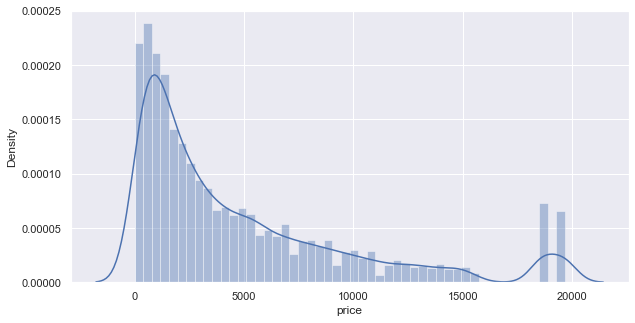

In [59]:
# distortion after imputation for the [price] column.
sns.distplot(df['price'])

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

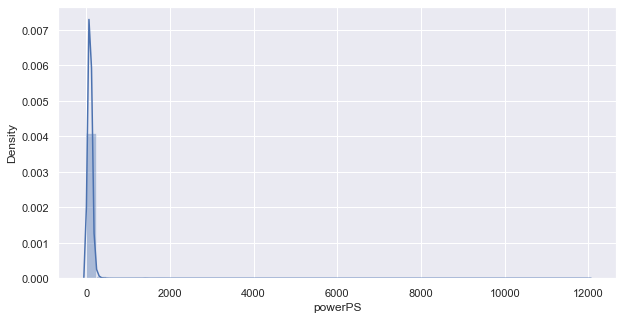

In [60]:
# plot the distribution for the powerPS column.
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df['powerPS'])

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='powerPS'>

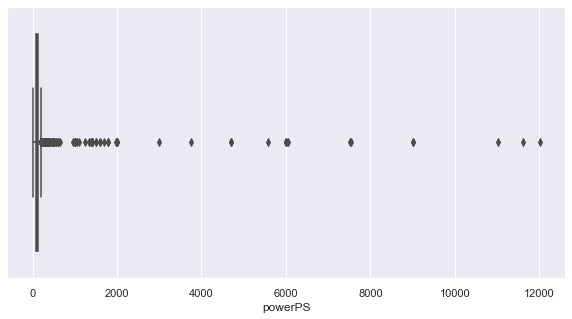

In [61]:
# the outliers before imputation
sns.boxplot(df['powerPS'])

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='powerPS'>

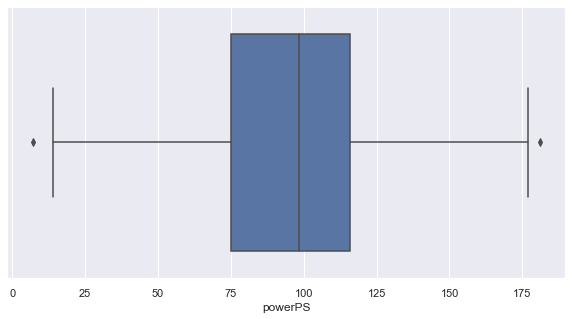

In [62]:
# impute the outliers for the [powerPS] column.

for i in df['powerPS']:
    q1= df['powerPS'].quantile(0.25)
    q3= df['powerPS'].quantile(0.75)
    iqr= q3-q1
    lower_tail= q1 - 1.5 * iqr
    upper_tail= q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df['powerPS']= df['powerPS'].replace(i, np.mean(df['powerPS']))
        
# the outliers after imputation
sns.boxplot(df['powerPS'])

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

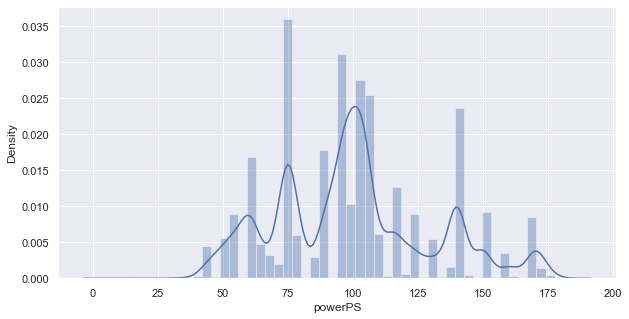

In [63]:
# distortion after imputation for the [powerPS] column.
sns.distplot(df['powerPS'])

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yearOfRegistration', ylabel='Density'>

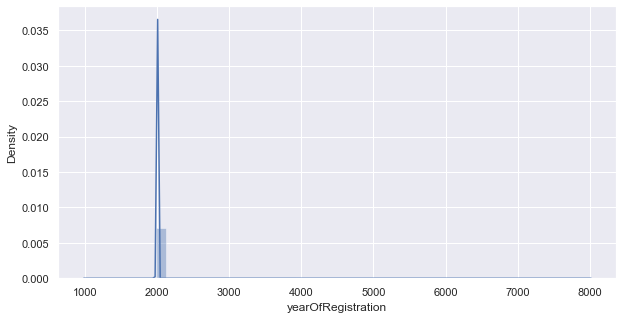

In [64]:
# plot the distribution for the powerPS column.
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(df['yearOfRegistration'])

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yearOfRegistration'>

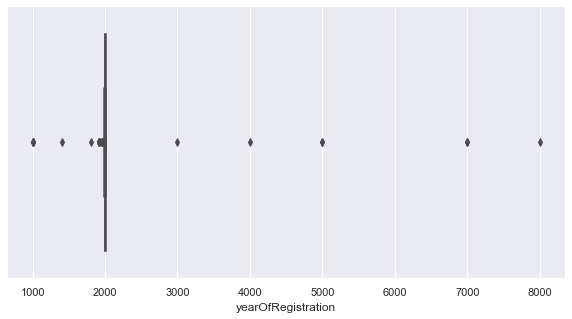

In [65]:
# the outliers before imputation
sns.boxplot(df['yearOfRegistration'])

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yearOfRegistration'>

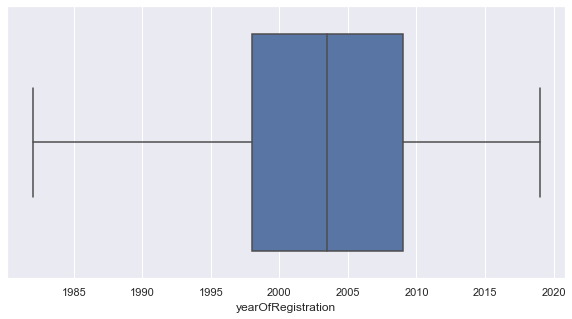

In [66]:
# impute the outliers for the [yearOfRegistration] column.

for i in df['yearOfRegistration']:
    q1= df['yearOfRegistration'].quantile(0.25)
    q3= df['yearOfRegistration'].quantile(0.75)
    iqr= q3-q1
    lower_tail= q1 - 1.5 * iqr
    upper_tail= q3 + 1.5 * iqr
    if i > upper_tail or i < lower_tail:
        df['yearOfRegistration']= df['yearOfRegistration'].replace(i, 0)
        
# dropthe null value      
df= df[df['yearOfRegistration'] != 0]
        
# the outliers after imputation
sns.boxplot(df['yearOfRegistration'])

C:\Users\mahmoud\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yearOfRegistration', ylabel='Density'>

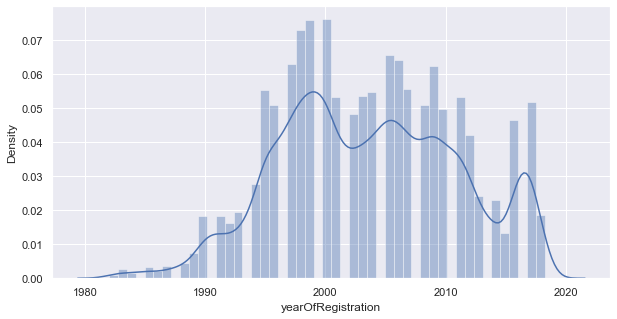

In [67]:
# distortion after imputation for the [yearOfRegistration] column.
sns.distplot(df['yearOfRegistration'])

<AxesSubplot:>

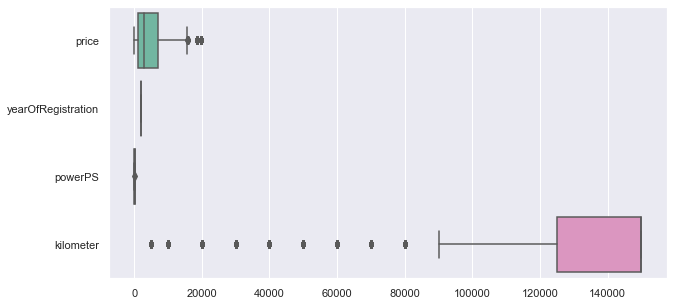

In [68]:
# boxplo for all the data.
sns.boxplot(data=df, orient="h", palette="Set2")

In [69]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand
0,480.0,limousine,1993,manual,95.905349,golf,150000,electric,volkswagen
3,1500.0,kleinwagen,2001,manual,75.000000,golf,150000,electric,volkswagen
9,999.0,kleinwagen,1998,manual,101.000000,golf,150000,electric,volkswagen
11,2799.0,van,2005,manual,140.000000,passat,150000,diesel,volkswagen
12,999.0,van,1995,manual,115.000000,passat,150000,electric,volkswagen


In [70]:
# convert the [['price','powerPS']] columns for int.
df['powerPS']= df['powerPS'].astype('int64')

In [71]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand
0,480.0,limousine,1993,manual,95,golf,150000,electric,volkswagen
3,1500.0,kleinwagen,2001,manual,75,golf,150000,electric,volkswagen
9,999.0,kleinwagen,1998,manual,101,golf,150000,electric,volkswagen
11,2799.0,van,2005,manual,140,passat,150000,diesel,volkswagen
12,999.0,van,1995,manual,115,passat,150000,electric,volkswagen


<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

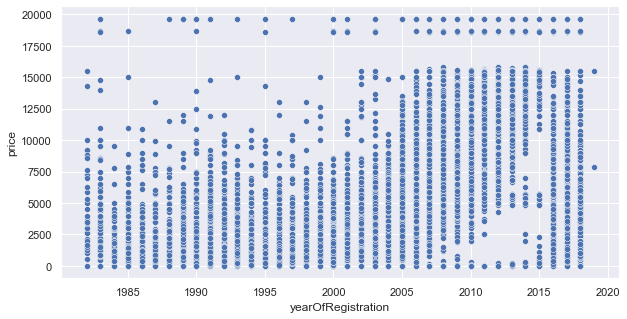

In [72]:
sns.scatterplot(data=df, x="yearOfRegistration", y="price")

<AxesSubplot:xlabel='powerPS', ylabel='price'>

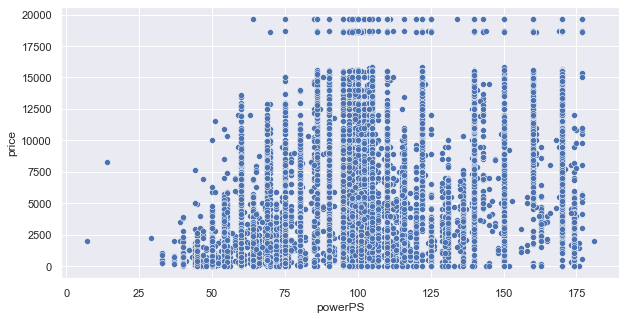

In [73]:
sns.scatterplot(data=df, x="powerPS", y="price")

In [74]:
df['brand'].unique()

array(['volkswagen'], dtype=object)

In [75]:
# drop the brand column.
df.drop('brand', axis=1, inplace=True)

In [86]:
# Encode the gearbox column
from sklearn.preprocessing import LabelEncoder,StandardScaler

label_encoder = LabelEncoder()
df['gearbox']= label_encoder.fit_transform(df['gearbox'])

In [77]:
# categorical to numaric.

df= pd.get_dummies(df, columns=['vehicleType','model','fuelType'])
pd.set_option('display.max_columns', None)
df.head()

,price,yearOfRegistration,gearbox,powerPS,kilometer,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_limousine,vehicleType_suv,vehicleType_van,model_beetle,model_golf,model_passat,model_polo,model_scirocco,model_tiguan,model_touran,fuelType_diesel,fuelType_electric,fuelType_gasoline,fuelType_hybrid
0,480.0,1993,1,95,150000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1500.0,2001,1,75,150000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
9,999.0,1998,1,101,150000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
11,2799.0,2005,1,140,150000,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
12,999.0,1995,1,115,150000,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [184]:
df['gearbox'].value_counts()

1    39892
0     6490
Name: gearbox, dtype: int64

# __split the data.__

In [158]:
# preparing the data to train.
y= pd.DataFrame(df['price'])
x= df.loc[:,(df.columns!='price')]

In [171]:
# split the data  to train and test sample.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [185]:
# scaling the train data.
scaler= StandardScaler()

scaler.fit_transform(x_train)
scaler.fit_transform(x_test)

array([[-2.25775687,  0.40134318,  0.2185745 , ...,  0.64976794,
         0.        ,  0.        ],
       [-0.22873272, -2.49163324, -0.84729438, ...,  0.64976794,
         0.        ,  0.        ],
       [-1.98722031, -2.49163324, -0.94721958, ...,  0.64976794,
         0.        ,  0.        ],
       ...,
       [ 0.04180383,  0.40134318,  0.01872408, ..., -1.53901099,
         0.        ,  0.        ],
       [ 1.25921832,  0.40134318, -0.01458432, ...,  0.64976794,
         0.        ,  0.        ],
       [-0.63453755,  0.40134318,  0.65158373, ...,  0.64976794,
         0.        ,  0.        ]])

# __ML model.__

In [194]:
# import xgboost for train the data.
import xgboost as xgb

model = xgb.XGBRegressor()

# search for the optimal hyperparameter.
from sklearn.model_selection import GridSearchCV

param_grid= {'max_depth': [2,3,4,5,6],
            'n_estimators': [125,150,175,200]}

search= GridSearchCV(model, param_grid, cv=10).fit(x_train, y_train)
search.best_params_

{'max_depth': 5, 'n_estimators': 125}

In [195]:
# fit the model.

model= xgb.XGBRegressor(max_depth= search.best_params_['max_depth'],
                           n_estimators= search.best_params_['n_estimators'])

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=125, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [196]:
# try pred.
y_pred= model.predict(x_test)

In [197]:
# predict score.
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8380194728805744

In [198]:
# train csore.
model.score(x_train, y_train)

0.8641059308729928

In [199]:
# from xgboost import plot_importance

# plot_importance(regressor, max_num_features=8)

# __saving the model.__

In [200]:
# save the model.
import joblib

joblib.dump(model, 'model.h5')

['model.h5']

In [201]:
# save the scaling.
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [202]:
x.columns

Index(['yearOfRegistration', 'gearbox', 'powerPS', 'kilometer',
       'vehicleType_bus', 'vehicleType_cabrio', 'vehicleType_coupe',
       'vehicleType_kleinwagen', 'vehicleType_limousine', 'vehicleType_suv',
       'vehicleType_van', 'model_beetle', 'model_golf', 'model_passat',
       'model_polo', 'model_scirocco', 'model_tiguan', 'model_touran',
       'fuelType_diesel', 'fuelType_electric', 'fuelType_gasoline',
       'fuelType_hybrid'],
      dtype='object')